In [1]:
!ls -l ../output/

total 466320
-rw-r--r--  1 yoavfreund  staff     797672 Jun  7 14:14 'Homeland' Suffered A Major Intelligence Failure-9IE1mUL1erk_Faces.pkl
-rw-r--r--@ 1 yoavfreund  staff  124582337 Jun  8 16:44 19 Days And Counting-JxQKYgw9G2k.mp4
-rw-r--r--  1 yoavfreund  staff     735293 Jun  7 15:59 19 Days And Counting-JxQKYgw9G2k_Faces.pkl
-rw-r--r--  1 yoavfreund  staff     256327 Jun  8 13:52 19 Days And Counting-JxQKYgw9G2k_Tracks.pkl
-rw-r--r--  1 yoavfreund  staff     638994 Jun  7 16:45 A Modest PromPosal For Bernie Sanders-kRsRUIPoW4E_Faces.pkl
-rw-r--r--  1 yoavfreund  staff     221955 Jun  7 13:29 A Moment For South Carolina-GDFrVwgicsc_Faces.pkl
-rw-r--r--  1 yoavfreund  staff     749714 Jun  7 14:41 A Special Halloween Warning-mkuyOVckB8s_Faces.pkl
-rw-r--r--  1 yoavfreund  staff     998709 Jun  7 15:30 A Tahini Bit Of Perspective On Politics-q-cirwvF-SI_Faces.pkl
-rw-r--r--  1 yoavfreund  staff     338963 Jun  7 16:40 A Tribute To Glenn Frey-0DaJGhJz7SY_Faces.pkl
-rw-r--r--  1 yoavfr

In [3]:
import pickle
Windows_filename='/Users/yoavfreund/projects/facesAnalysis/output/19 Days And Counting-JxQKYgw9G2k_Windows.pkl'
windows=pickle.load(open(Windows_filename,'r'))

In [4]:
len(windows)

375

In [5]:
%pylab inline
import cv2
def imshow_rgb(image_bgr,Title=''):
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    imshow(image_rgb)
    if Title != '':
        title(Title)

Populating the interactive namespace from numpy and matplotlib


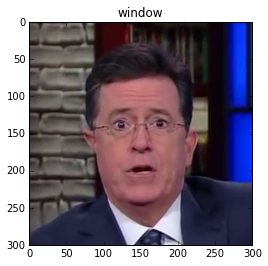

In [7]:
imshow_rgb(windows[100][-1],'window')

In [94]:
image = windows[50][-1]
subimage = image[110:190,110:190]

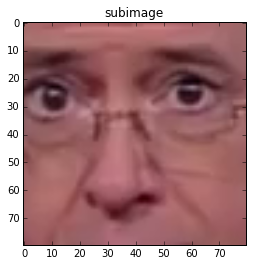

In [95]:
imshow_rgb(subimage,'subimage')

In [26]:
h,w,colors=shape(subimage)
BRG=zeros([h*w,3])

for i in range(3):
    BRG[:,i]=ravel(subimage[:,:,i])

ERROR! Session/line number was not unique in database. History logging moved to new session 2717


(array([  94.6275   ,   91.3575   ,  148.8871875]),
 array([ 22.1317926 ,  23.03184629,  28.93447487]))

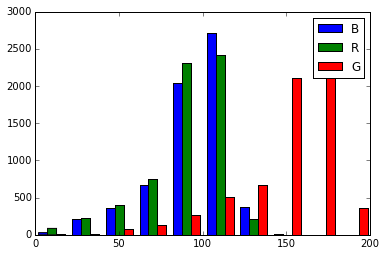

In [40]:
hist(BRG,label=['B','R','G']);
legend();
mean(BRG,axis=0),std(BRG,axis=0)

(array([ 121.9628125,  101.7353125,  148.8871875]),
 array([  2.5549324 ,  19.29999846,  28.93447487]))

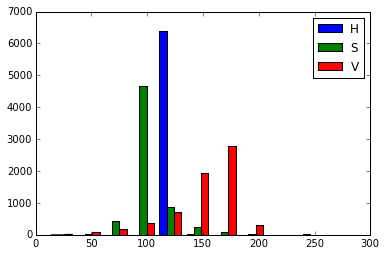

In [43]:
subimage_hsv=cv2.cvtColor(subimage, cv2.COLOR_RGB2HSV)
h,w,colors=shape(subimage)
HSV=zeros([h*w,3])

for i in range(3):
    HSV[:,i]=ravel(subimage_hsv[:,:,i])
hist(HSV,label=['H','S','V']);
legend();

Mean_hsv=mean(HSV,axis=0)
STD_hsv=std(HSV,axis=0)
Mean_hsv, STD_hsv

(array([  82.11578889,  109.50963333,   96.40185556]),
 array([ 61.06462864,  69.6167229 ,  61.20974733]))

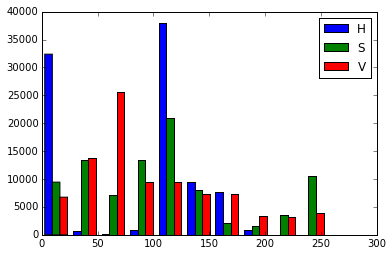

In [42]:
image_hsv=cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h,w,colors=shape(image)
HSV=zeros([h*w,3])

for i in range(3):
    HSV[:,i]=ravel(image_hsv[:,:,i])
hist(HSV,label=['H','S','V']);
legend();

mean(HSV,axis=0),std(HSV,axis=0)

In [51]:
notface=sum(((image_hsv-Mean_hsv)/STD_hsv)**2,axis=2)

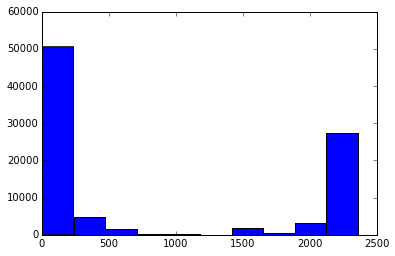

In [52]:
hist(ravel(notface));

numpy.ndarray

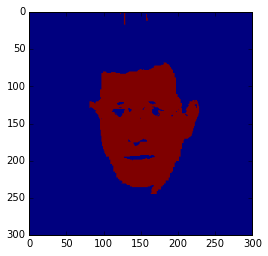

In [85]:
mask=(1*(notface<10)).astype(int)
imshow(mask)
type(mask)

In [99]:
from scipy.ndimage.morphology import binary_fill_holes,binary_dilation
import scipy.ndimage as ndimage

In [175]:
%%writefile crop_face.py

def crop_face(image):
    """takes as input an rgb image of a centered face. crops the skin part out using the HSV distribution of the center
    part. Fills in the holes and returns the cropped image as a grey-value matrix"""
    assert shape(image)==(300,300,3)
    subimage = image[110:190,110:190]

    #figure(figsize=(10,5))

    #subplot(3,2,1)
    #imshow_rgb(image)
    #subplot(3,2,2)
    #imshow_rgb(subimage)

    subimage_hsv=cv2.cvtColor(subimage, cv2.COLOR_RGB2HSV)
    image_hsv=cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h,w,colors=shape(subimage)
    HSV=zeros([h*w,3])

    #subplot(3,2,3)
    for i in range(3):
        HSV[:,i]=ravel(subimage_hsv[:,:,i])
    #hist(HSV,label=['H','S','V']);
    #legend();

    Mean_hsv=mean(HSV,axis=0)
    STD_hsv=std(HSV,axis=0)

    #print 'mean=',Mean_hsv,', std=', STD_hsv

    notface=sum(((image_hsv-Mean_hsv)/STD_hsv)**2,axis=2)
    mask=(1*(notface<10)).astype(int)
    #subplot(3,2,4)
    #imshow(mask);

    label_im, nb_labels = ndimage.label(mask)
    sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
    mask=label_im==argmax(sizes)
    #imshow(mask)

    mask2=binary_fill_holes(mask)
    #subplot(3,2,5)
    #imshow(mask2)

    image2=copy(image)
    for i in range(3):
        image2[:,:,i] *= mask2   #2.astype(int64)

    grey_image=sum(image2,axis=2)
    subplot(3,2,6)
    #imshow(grey_image, cmap='Greys_r')
    return grey_image

Writing crop_face.py


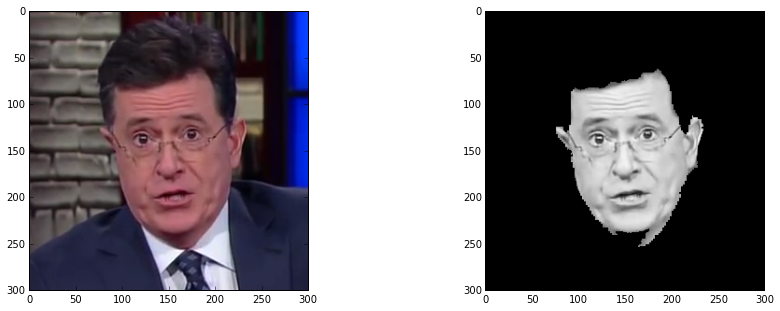

In [196]:
figure(figsize(15,5))
image = windows[260][-1]
subplot(1,2,1)
imshow_rgb(image)
extracted=crop_face(image)
subplot(1,2,2)
imshow(extracted, cmap='Greys_r')

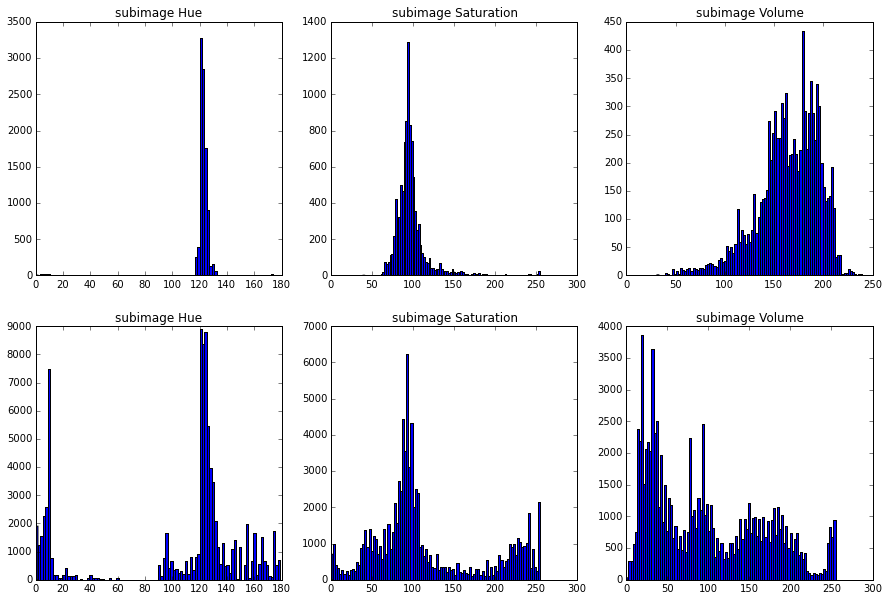

In [77]:
image = windows[20][-1]
subimage = image[100:200,100:200]
image_hsv=cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
subimage_hsv=cv2.cvtColor(subimage, cv2.COLOR_RGB2HSV)

figure(figsize=(15,10))
subplot(2,3,1)
hist(ravel(subimage_hsv[:,:,0]),bins=100);
title('subimage Hue')
subplot(2,3,2)
hist(ravel(subimage_hsv[:,:,1]),bins=100);
title('subimage Saturation')
subplot(2,3,3)
hist(ravel(subimage_hsv[:,:,2]),bins=100);
title('subimage Volume')

subplot(2,3,4)
hist(ravel(image_hsv[:,:,0]),bins=100);
title('subimage Hue')
subplot(2,3,5)
hist(ravel(image_hsv[:,:,1]),bins=100);
title('subimage Saturation')
subplot(2,3,6)
hist(ravel(image_hsv[:,:,2]),bins=100);
title('subimage Volume')

In [37]:
image_hsv=cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

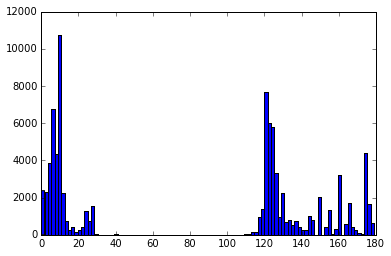

In [51]:
hist(ravel(image_hsv[:,:,0]),bins=100);

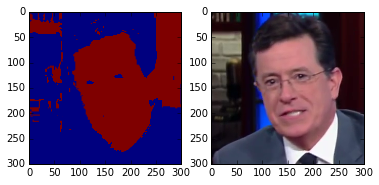

In [67]:
image = windows[20][-1]
subimage = image[100:200,100:200]
image_hsv=cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image_H = image_hsv[:,:,0]

skin=1.0*(image_H>115) * 1.0*(image_H<130)
subplot(1,2,1)
imshow(skin)
subplot(1,2,2)
imshow_rgb(image)

In [167]:
shape(image)

(300, 300, 3)